<a href="https://colab.research.google.com/github/Amrith-ops/Identify-the-Sentiment/blob/master/Predicting_links_relationship_between_Friends_in_Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import xgboost as xgb
import math


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1uDrvP0cxFnIkNvSOTeq-AERak60uaqdF'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Copy of train.csv') 


In [ ]:
fb=pd.read_csv('Copy of train.csv')
fb.head(10)

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927
5,2,1194519
6,2,470294
7,2,961886
8,2,626040
9,3,176995


In [ ]:
print(fb.shape)
unique_nodes=np.unique(fb['source_node'].values)
unique_dest=np.unique(fb['destination_node'].values)
print(len(unique_nodes))
print(len(unique_dest))
print('percentage of unique number of nodes in a given dataset',len(unique_nodes)/fb.shape[0])#This means 84 percent of points in a source-node are repeating
print(len(unique_dest)-len(unique_nodes),'differnce in no of points b/w source and destination node')
#What are those points which are present in destination node but not in source node
diff=set(unique_dest)-set(unique_nodes)
print(diff)

In [ ]:
print(fb[fb['source_node']==16])
print(fb[fb['destination_node']==16])
#I checked whether the point 16 present in source node>>it gave me empty rows
#On the other hand i checked whether 16 present in destination node>>it gave me a row which is followed by some source node
#Conclusion is there are some points in this dataset which are having (followers) but arent following back>>(obviously such things can be seen in Instagram).

Empty DataFrame
Columns: [source_node, destination_node]
Index: []
         source_node  destination_node
9380725      1851097                16


In [ ]:
#I also want to check how many person each person is following
following=fb['source_node'].value_counts()
print((following))

1492489    1566
4850        895
141489      759
735020      652
1855498     587
           ... 
683013        1
10084         1
112934        1
6418          1
16376         1
Name: source_node, Length: 1587708, dtype: int64


In [ ]:
fb[(fb['source_node']==690569) & (fb['destination_node']==1)]

,source_node,destination_node
3506359,690569,1


In [ ]:
fb1=nx.read_edgelist('Copy of train.csv',delimiter=',',create_using=nx.DiGraph)
fb1 

In [ ]:
p=('source_node','destination_node')
fb1.remove_edge(*p)

In [ ]:
fb1.remove_node('source_node')
fb1.remove_node('destination_node')

In [ ]:
print(list(fb1.edges())[:40])
print(fb1.number_of_nodes())
print(fb1.number_of_edges())

[('1', '690569'), ('1', '315892'), ('1', '189226'), ('690569', '663369'), ('690569', '603627'), ('690569', '799834'), ('690569', '530257'), ('690569', '1362910'), ('690569', '1434984'), ('690569', '366100'), ('690569', '533878'), ('690569', '798473'), ('690569', '327217'), ('690569', '315892'), ('690569', '583208'), ('690569', '353091'), ('690569', '834718'), ('690569', '189226'), ('690569', '1'), ('690569', '1658788'), ('690569', '1413310'), ('690569', '1465653'), ('690569', '1629462'), ('690569', '687321'), ('315892', '1642294'), ('315892', '865354'), ('315892', '1810969'), ('315892', '1028735'), ('315892', '324385'), ('315892', '772853'), ('315892', '1083438'), ('315892', '94256'), ('315892', '1626389'), ('315892', '1615316'), ('315892', '644564'), ('315892', '446503'), ('315892', '1434984'), ('315892', '915136'), ('315892', '724619'), ('315892', '1132075')]
1862220
9437519


Text(0, 0.5, 'No of followings/person')

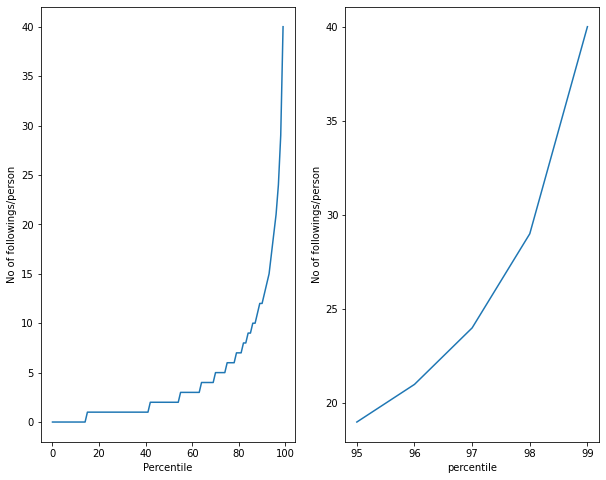

In [ ]:
following1=fb1.out_degree()
following_val=(list(dict(following1).values()))
following_key=list(dict(following1).keys())
a=np.percentile(following_val,np.arange(0,100))
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,8))
ax1.plot(np.arange(0,100),a)
ax1.set_xlabel('Percentile')
ax1.set_ylabel('No of followings/person')
b=np.percentile(following_val,np.arange(95,100,1))
ax2.plot(np.arange(95,100,1),b)
ax2.set_xlabel('percentile')
ax2.set_ylabel('No of followings/person')


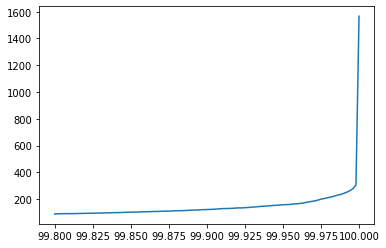

In [ ]:
a=np.percentile(following_val,np.linspace(99.8,100,100))
plt.plot(np.linspace(99.8,100,100),a)

Observation:
From the above graphs,we can conclude that 99.8 percent of the people are following below 100 persons.
Only 0.01 percent of the people are following more than 1600 people

Text(0, 0.5, 'No of followers/each person')

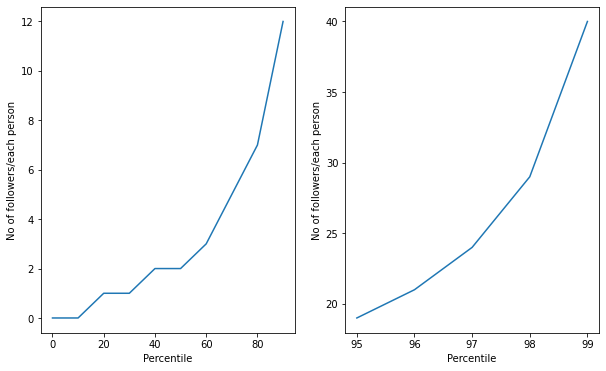

In [ ]:
followers=dict(fb1.in_degree())
followers_val=list(followers.values())
a1=np.percentile(followers_val,np.arange(0,100,10))
fig1,(ax3,ax4)=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax3.plot(np.arange(0,100,10),a1)
ax3.set_xlabel('Percentile')
ax3.set_ylabel('No of followers/each person')
b1=np.percentile(followers_val,np.arange(95,100,1))
ax4.plot(np.arange(95,100,1),b1)
ax4.set_xlabel('Percentile')
ax4.set_ylabel('No of followers/each person')

Text(0, 0.5, 'No of followers/each person')

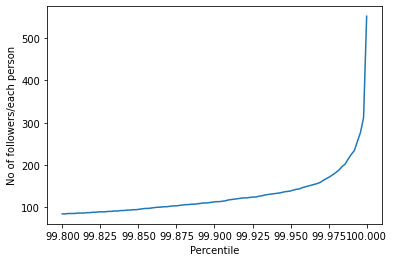

In [ ]:
a3=np.percentile(followers_val,np.linspace(99.8,100,100))
plt.plot(np.linspace(99.8,100,100),a3)
plt.xlabel('Percentile')
plt.ylabel('No of followers/each person')

Observation:
From the above two graphs we can observe that 99.800 percent of the people has less than 100 followers on the other hand 0.0275 percent people has followers more than 500 people.

In [ ]:
#Does most of the people follow back others if followed?
#Out of all followers for a given person how many persons does he follow back
#(following/followers) ratio
def func(a,b):
  return(a/(b+0.0001))
follow_ratio=list(map(func,following_val,followers_val))
print(follow_ratio[:40])

[0.9999666677777407, 0.7241354340157448, 1.142853061239067, 1.3332888903703208, 1.4999625009374766, 0.8732382067067511, 0.7222202160549553, 0.8235245675025441, 1.3333269841572184, 0.9166590278414347, 1.1999760004799904, 0.545449586821938, 0.8235245675025441, 1.1794841551688329, 0.8749945312841795, 0.7999960000199999, 1.2499687507812305, 0.999980000399992, 1.9998000199980002, 1.0689618311660993, 0.5555493827846357, 0.9999500024998749, 0.9166590278414347, 1.2499687507812305, 0.9999000099990001, 0.9499952500237498, 0.9999666677777407, 0.0, 0.9999666677777407, 1.3332888903703208, 0.9999000099990001, 1.4999250037498124, 0.9999500024998749, 1.1249859376757791, 1.2499687507812305, 10000.0, 0.4222212839527023, 10000.0, 0.14285612245626816, 0.9999666677777407]


Text(0.5, 0, 'Percentile')

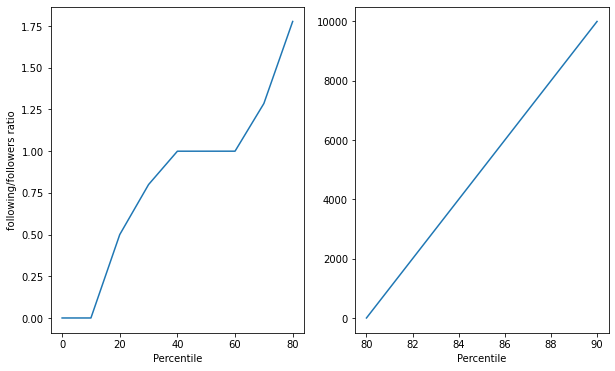

In [ ]:
folratio_percent=np.percentile(follow_ratio,np.arange(0,90,10))
fig,(ax5,ax6)=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax5.plot(np.arange(0,90,10),folratio_percent)
ax5.set_xlabel('Percentile')
ax5.set_ylabel('following/followers ratio')
c1=np.percentile(follow_ratio,np.arange(80,100,10))
ax6.plot(np.arange(80,100,10),c1)
ax6.set_xlabel('Percentile')

Observation:
For the 25th percentile the value is 0.5,which means 25 percent of values has less than 0.5 which further indicates there are 25 percent of people who follows back with (<50%chance) if followed.
On the other hand,there are 75 percent values which are greater than '1' which tells that 75 percent of people follows back the person if followed.

In [ ]:
#How many people are there who dont follow but still followed by others?
print('no of people who are not following anyone is',sum(np.array(following_val)==0))
print('no of people who got zero followers is',sum(np.array(followers_val)==0))
print('no of people who are not following anyone but still followed by others',sum((np.array(following_val)==0) & (np.array(followers_val)==1)))


no of people who are not following anyone is 274512
no of people who got zero followers is 188043
no of people who are not following anyone but still followed by others 185443


In [ ]:
import csv
r=csv.reader(open('Copy of train.csv','r'))
edge=dict()
for e in r:
  edge[e[0],e[1]]=1
missing_edges=set([])
while(len(missing_edges)<fb.shape[0]):
  d1=np.random.randint(0,fb1.number_of_nodes())
  t=np.random.randint(0,fb1.number_of_nodes())
  l=edge.get((d1,t),-1)
  if (l==-1) and d1!=t:
    try:
      if(nx.shortest_path_length(fb1,source=d1,target=t))>2:
        missing_edges.add((d1,t))
      else:
        continue
    except:
      missing_edges.add((d1,t))


In [ ]:
print(len(missing_edges))

9437519


In [ ]:
from sklearn.model_selection import train_test_split
fb_pos=fb
fb_neg=pd.DataFrame(list(missing_edges),columns=['source_node','destination_node'])
X_trainpos,X_testpos,y_trainpos,y_testpos=train_test_split(fb_pos,np.ones(fb.shape[0]),test_size=0.2,random_state=14)
print(X_trainpos.shape,y_trainpos.shape,'X_trainpos')
print(X_testpos.shape,y_testpos.shape,'X_testpos')
X_trainneg,X_testneg,y_trainneg,y_testneg=train_test_split(fb_neg,np.zeros(fb.shape[0]),test_size=0.2,random_state=14)
print(X_trainneg.shape,y_trainneg.shape,'X_trainneg')
print(X_testneg.shape,y_testneg.shape,'Xtest_neg')


(7550015, 2) (7550015,) X_trainpos
(1887504, 2) (1887504,) X_testpos
(7550015, 2) (7550015,) X_trainneg
(1887504, 2) (1887504,) Xtest_neg


In [ ]:
X_trainpos.to_csv('X_trainpos.csv',header=True,index=True)
X_testpos.to_csv('X_testpos.csv',header=False,index=False)
X_trainneg.to_csv('X_trainneg.csv',header=False,index=False)
X_testneg.to_csv('X_testneg.csv',header=False,index=False)

In [ ]:
import numpy as np
X_train=pd.concat((X_trainpos,X_trainneg),axis=0)
y_train=pd.concat((pd.Series(y_trainpos),pd.Series(y_trainneg)),axis=0)
y_test=pd.concat((pd.Series(y_testpos),pd.Series(y_testneg)),axis=0)
print(X_train.shape,y_train.shape,'X_train')
X_test=pd.concat((X_testpos,X_testneg),axis=0)
print(X_test.shape,y_test.shape,'X_test')

(15100030, 2) (15100030,) X_train
(3775008, 2) (3775008,) X_test


In [ ]:
X_train.to_csv('X_train.csv',header=False,index=False)
X_test.to_csv('X_test.csv',header=False,index=False)
y_train.to_csv('y-train.csv',header=False,index=False)
y_test.to_csv('y_test.csv',header=False,index=False)

In [ ]:

test_graph=nx.read_edgelist('X_testpos.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)
train_nodes=set(list(train_graph.nodes()))
test_nodes=set(list(test_graph.nodes()))
train_com_test=len(train_nodes.intersection(test_nodes))
test_train_diff=len(test_nodes-train_nodes)
print(test_train_diff)
print('no of points which are present in test data but not in train data are {}'.format(test_train_diff))

81482
no of points which are present in test data but not in train data are 81482


In [ ]:
print('Percentage of points which are present in test data but not present in train data are {}'.format((test_train_diff/len(test_nodes))*100))
#So im asking my model to predict for 7 percent of points which it has never seen before or learned before,this is Cold start problem.

Percentage of points which are present in test data but not present in train data are 7.120604240273422


In [ ]:
print(nx.is_strongly_connected(train_graph))
print(nx.is_weakly_connected(train_graph))

False
False


In [ ]:
print(nx.number_strongly_connected_components(train_graph))
print(nx.number_weakly_connected_components(train_graph))

610591
48755


In [ ]:
from collections import Counter
xw=list(map(len,list(nx.weakly_connected_components(train_graph))))
print((xw))


[1649365, 2, 16, 5, 3, 16, 20, 27, 2, 23, 10, 37, 2, 3, 2, 5, 2, 5, 29, 2, 2, 19, 5, 4, 30, 15, 51, 2, 8, 2, 6, 8, 23, 4, 3, 2, 3, 4, 2, 10, 2, 3, 3, 2, 7, 13, 9, 3, 13, 2, 5, 2, 5, 3, 2, 10, 4, 15, 2, 30, 26, 7, 2, 4, 7, 3, 12, 11, 2, 2, 10, 7, 25, 4, 2, 3, 2, 20, 3, 4, 3, 3, 26, 52, 59, 9, 3, 3, 3, 2, 5, 4, 16, 15, 4, 4, 6, 31, 2, 22, 6, 6, 12, 40, 3, 16, 6, 5, 3, 9, 36, 68, 2, 12, 12, 4, 3, 3, 2, 17, 2, 6, 18, 3, 7, 2, 12, 9, 13, 8, 2, 3, 3, 4, 3, 6, 22, 2, 12, 2, 13, 56, 3, 14, 2, 4, 4, 2, 12, 2, 11, 11, 29, 3, 14, 11, 38, 2, 2, 2, 22, 2, 2, 2, 2, 6, 2, 5, 6, 2, 29, 3, 15, 19, 5, 7, 10, 2, 2, 2, 10, 2, 11, 7, 3, 7, 16, 4, 13, 4, 14, 5, 20, 2, 13, 13, 2, 14, 13, 3, 2, 3, 6, 2, 23, 2, 4, 10, 2, 14, 2, 4, 2, 7, 2, 4, 4, 19, 18, 4, 11, 7, 28, 2, 2, 3, 2, 21, 2, 3, 9, 8, 4, 19, 3, 8, 2, 4, 2, 3, 4, 13, 11, 2, 4, 2, 18, 18, 3, 3, 17, 39, 10, 3, 5, 2, 2, 2, 3, 4, 6, 2, 12, 10, 26, 5, 7, 2, 5, 2, 30, 2, 13, 26, 25, 2, 2, 16, 9, 21, 7, 12, 2, 3, 4, 7, 2, 2, 3, 4, 11, 2, 2, 9, 3, 4, 3, 2, 2,

48755
dict_keys([1649365, 2, 16, 5, 3, 20, 27, 23, 10, 37, 29, 19, 4, 30, 15, 51, 8, 6, 7, 13, 9, 26, 12, 11, 25, 52, 59, 31, 22, 40, 36, 68, 17, 18, 56, 14, 38, 28, 21, 39, 24, 33, 41, 42, 35, 32, 54, 48, 49, 53, 75, 67])
dict_values([1, 34664, 33, 1256, 7926, 7, 4, 11, 125, 1, 9, 13, 2750, 7, 36, 1, 252, 680, 382, 49, 193, 6, 67, 97, 7, 1, 1, 2, 8, 2, 3, 1, 24, 24, 1, 56, 1, 10, 14, 3, 11, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1])
1780738


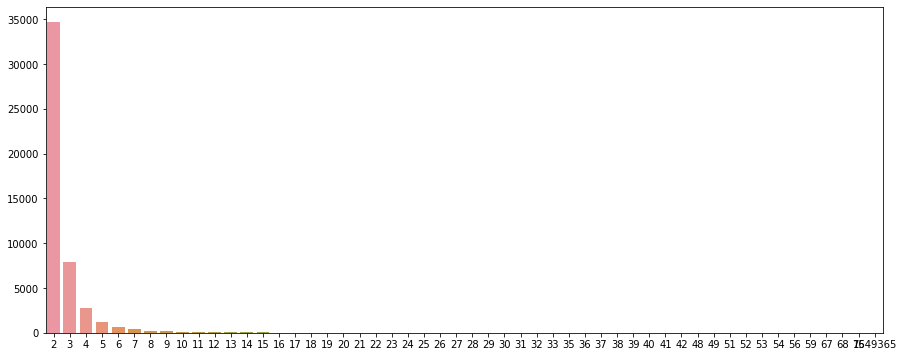

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
print(len(xw))
count=dict(Counter(xw))
print(count.keys())
print(count.values())
print(nx.number_of_nodes(train_graph))
fig=plt.figure(figsize=(15,6))
ax=sb.barplot(x=list(count.keys()),y=list(count.values()))

Observation:
As we see above,the train_graph consists most of the weak components which is of size 2 i.e around 35,000.Weak components with size 2 indicates there are just two nodes with a single edge b/w them forming a component.This can be useful while calculating shortest path length and checking whether both of the users belong to same community or not.In other words while checking whether these two nodes belong to same community i would end up considering these two nodes as (one community) hence i classify that there is a link between them.




#Jaccard Distance

In [ ]:
def jacard1(a,b):
  try:
    if len(set(train_graph.successors(a)))==0 | len(set(train_graph.successors(b)))==0:
      return(0)
    sim=len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))/len(set(train_graph.successors(a)).union(set(train_graph.successors(b))))
  except:
    return(0)
  return(sim)

In [ ]:
def jacard_followers(a,b):
  try:
    if len(set(train_graph.predecessors(a)))==0 | len(set(train_graph.predecessors(b)))==0:
      return(0)
    sim=len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))/len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b))))
  except:
    return(0)
  return(sim)

#Cosine Similarity

In [ ]:
import math
def cosine_following1(a,b):
  try:
    if len(set(train_graph.successors(a)))==0 | len(set(train_graph.successors(b)))==0:
      #As we saw before whie doing EDA,i.e there are 2,70,000 people who are not following anyone(zero)
      #So we introduced this condition checking if either of the node has zero following.
      #If anyone has zero following then there is no point in checking further,because it will have zero common elements hence Cosine similarity be zero.
        return 0
    cosine_intersection=len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
    length=math.sqrt(len(set(train_graph.successors(a)))*len(set(train_graph.successors(b))))
    print(length)
    simi=cosine_intersection/(length)
    print(simi,'simi')
    return(simi)
  except:
    return(0)

  

In [ ]:
def cosine_followers1(a,b):
  try:
    if len(set(train_graph.predecessors(a)))==0 | len(set(train_graph.predecessors(b))):
        #As we saw before whie doing EDA,i.e there are 2,70,000 people who are not following anyone(zero)
        #So we introduced this condition checking if either of the node has zero following.
        #If anyone has zero following then there is no point in checking further,because it will have zero common elements hence Cosine similarity be zero
        return 0
    cosine_intersection=len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))
    length=math.sqrt(len(set(train_graph.predecessors(a)))*len(set(train_graph.predecessors(b))))
    similar=cosine_intersection/length
    return(similar)
  except:
      return 0
  

#Page Rank

In [ ]:
rank=nx.pagerank(train_graph,alpha=0.85)
pagerank_mean=sum(list(rank.values()))/(len(list(rank.values())))


In [ ]:
def pagerank(rank,a):
  node1=rank.get(a,pagerank_mean)
  return(node1)

#Shortest path length

In [ ]:
def shortest_path(a,b):
  p=-1
  try:
    if train_graph.has_edge(a,b):
      train_graph.remove_edge(*(a,b))
      p=nx.shortest_path_length(train_graph,source=a,target=b)
      train_graph.add_edge(*(a,b))
    else:
      p=nx.shortest_path_length(train_graph,source=a,target=b)
    return(p)
  except:
    return -1

#Checking for the same Community

Code logic:

1.First get the weak connected components from a graph
2.As we saw before there are many weakly connected components which are of length (2) i.e those components have 2nodes one edge.

Hence there are three cases to check:




*   1)Two nodes will have direct edge and also indirect edge or another path     connecting two nodes a and b
   
*   2)Two nodes will have direct edge and they two form a single component


*   3)Two nodes doesnt have any direct edge b/w them.
   




In [ ]:
from tqdm import tqdm
def check_for_community(a,b,graph):
  weak=nx.weakly_connected_components(graph)
  if train_graph.has_edge(a,b):  #Is there any direct edge?if so then check whether both nodes present in same component
    for i in tqdm(weak):
      if a in i:
        c=i
        break
        if b in c:               #Does both of nodes belongs to same component?if so check whether its weak component of size 2 by removing edge.
          train_graph.remove_edge(*(a,b))
          if(shortest_path(a,b)==-1):    #Is it component with 2nodes and 1edge?if so return 0 else it indicates that a part from direct edge b/w nodes the component has also indirect path b/w a and b.
            train_graph.add_edge(*(a,b))
            return(0)
          else:
            train_graph.add_edge(*(a,b))
            return(1)
        else:
          return(0)
  else:                       #If there is no direct edge then just check whether they belong to same community or not and return result accordingly.
    for i1 in tqdm(weak):
      if a in i1:
        c1=i1
        break
        if b in c1:
          return(1)
        else:
          return(0)


#Adar Index

Logic of Adar Index:
Sometimes its not how many common followers/followee b/w node A and B we should look for instead we should look for 'Who we both are following?'.To answer this question Adar Index will be helpful.First it takes common neighbors of node A and B and check how many followers are there for these neighbors and sum the result.Intuitively,lets say both A and B are following a 'meme page' in instagram does it mean these both needs to friends,no absolutely not..Here the meme page may consists of lot of followers and it gives very low logarithmic result>>low value indicates 'commonality b/w A and B has nothing to do with friendship or relation berween them'.

In [ ]:
def adar_index(a,b):
  try:
    u=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
    if(len(u)!=0):
      sum=0
      for j in u:
        sum+=(1/(np.log10(len(list(train_graph.predecessors(j))))))
      return(sum)
    else:
      return(0)
  except:
    return(0)

#Person following back

In [ ]:
def follow_back(a,b):
  if train_graph.has_edge(b,a):
    return(1)
  else:
    return(0)

#Katz Centrality

In [ ]:
r=nx.katz_centrality(train_graph)
mean_katz=sum(list(r.values()))/len(list(r.values()))
def katz(r,a):
  katz_source=r.get(a,mean_katz)
  return(katz_source)

#Hits score

Observation:
It works some what similar to Adar Index but the theme/idea of Adar Index revolves around 'Commonality of Neighbors',on the other hand Hits score works with the idea of 'Mutual relationship b/w pair of vertices'.
Suppose i follow Bill gates on Instagram does it mean he is a friend of me?No,not necessarily so how do i check that?This is where Hits score comes into picture.
Hubscore tells>the 'quality of links it refers to'>better the quality of links it refers to more Hub score.
Authority score>how many hubs(which they themselves have high score) are refering to a particular link?>>more the authority score more hubs are refering to alink.
So,now a 'Celebrity' will have high score since he is following other celebrities(u can think of as refering quality links).
At the same time,a Celebrity will have high authority score too,since other high profile people follow this person.

Celebrity>>(high Hubscore,high authority score)
Normal person>>(high/low Hubscore,but low authority score)

In [ ]:
n=nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
#returns two tuples of dictionary where keys are nodes and values are their (hubs,authorities) scores


#Random sampling of points

In [ ]:
import networkx as nx
test_graph2=nx.convert_matrix.from_pandas_edgelist(final_xtest,source='source_node',target='destination',create_using=nx.DiGraph)
print(test_graph2.number_of_nodes())

95562


In [ ]:
import random
train_sample=sorted(random.sample(range(0,15100030),15100030-100000))
test_sample=sorted(random.sample(range(0,3775008),3775008-50000))
print(len(train_sample))

15000030


In [ ]:
import pandas as pd
final_xtrain=pd.read_csv('X_train.csv',skiprows=train_sample,names=['source_node','destination'])
final_xtest=pd.read_csv('X_test.csv',skiprows=test_sample,names=['source_node','destination'])


In [ ]:
import random
import pandas as pd
import numpy as np
import networkx as nx
X_trainpos=pd.read_csv('X_trainpos.csv',sep=',').astype(int)
edges=X_trainpos[['source_node','destination_node']].values.tolist()

In [ ]:
train_graph=nx.DiGraph()
train_graph.add_nodes_from(X_trainpos['source_node'].values)
train_graph.add_nodes_from(X_trainpos['destination_node'].values)


In [ ]:
train_graph.add_edges_from(edges)

In [ ]:
final_xtrain['indicator']=pd.read_csv('y-train.csv',skiprows=train_sample)
final_xtest['indicator']=pd.read_csv('y_test.csv',skiprows=test_sample)

In [ ]:
print(final_xtrain.shape)
print(final_xtest.shape)
final_xtrain.head()
final_xtrain=final_xtrain.reset_index(drop=True)
final_xtest=final_xtest.reset_index(drop=True)
final_xtrain.head()

(100000, 3)
(50000, 3)


,source_node,destination,indicator
0,9205,1038541,1.0
1,187802,745022,1.0
2,35634,888460,1.0
3,1408954,1662316,1.0
4,180906,1628517,1.0


In [ ]:
from tqdm import tqdm
def no_followers(df,train_graph):

  num_followers_a=[]
  num_followers_b=[]
  num_following_a=[]
  num_following_b=[]
  intersection_followers=[]
  intersection_following=[]
  for i1,j1 in tqdm(df.iterrows()):
    a=int(j1[0])
    b=int(j1[1])
    try:
      a1=set(train_graph.predecessors(a))
      b1=set(train_graph.predecessors(b))
    except:
      a1=set()
      b1=set()
    num_followers_a.append(len(a1))
    num_followers_b.append(len(b1))
    try:
      c1=set(train_graph.successors(a))
      d1=(set(train_graph.successors(b)))
    except:
      c1=set()
      d1=set()
    num_following_a.append(len(c1))
    num_following_b.append(len(d1))

    intersection_followers.append(len(a1.intersection(b1)))
    intersection_following.append(len(c1.intersection(d1)))
  return(num_followers_a,num_followers_b,num_following_a,num_following_b,intersection_followers,intersection_following)

num_followers_a,num_followers_b,num_following_a,num_following_b,intersection_followers,intersection_following=no_followers(final_xtrain,train_graph)


100000it [00:12, 7983.46it/s]


In [ ]:
num_testfollowers_a,num_testfollowers_b,num_testfollowing_a,num_testfollowing_b,test_intersection_followers,test_intersection_following=no_followers(final_xtest,train_graph)

50000it [00:06, 7955.35it/s]


In [ ]:
final_xtrain['num_followers_a']=num_followers_a
final_xtrain['num_followers_b']=num_followers_b
final_xtrain['num_following_a']=num_following_a
final_xtrain['num_following_b']=num_following_b
final_xtrain['intersection_followers']=intersection_followers
final_xtrain['intersection_following']=intersection_following
#=========================================================================================
final_xtest['num_followers_a']=num_testfollowers_a
final_xtest['num_followers_b']=num_testfollowers_b
final_xtest['num_following_a']=num_testfollowing_a
final_xtest['num_following_b']=num_testfollowing_b
final_xtest['intersection_followers']=test_intersection_followers
final_xtest['intersection_following']=test_intersection_following

In [ ]:
final_xtrain['jacard_followers']=final_xtrain.apply(lambda x:jacard_followers(x['source_node'],x['destination']),axis=1)
final_xtrain['jacard_following']=final_xtrain.apply(lambda x: jacard1(x['source_node'],x['destination']),axis=1)
#==============================================================================================================================
final_xtest['jacard_followers']=final_xtest.apply(lambda x:jacard_followers(x['source_node'],x['destination']),axis=1)
final_xtest['jacard_following']=final_xtest.apply(lambda x: jacard1(x['source_node'],x['destination']),axis=1)

In [ ]:
final_xtrain.to_csv('final_xtrain.csv')
final_xtest.to_csv('final_xtest.csv')

In [ ]:
final_train['cosine_sim_following']=final_xtrain.apply(lambda x:cosine_followers1(x['source_node'],x['destination']),axis=1)
final_train['cosine_sim_followers']=final_xtrain.apply(lambda x:cosine_following1(x['source_node'],x['destination']),axis=1)

In [ ]:
final_train.head(2)

,source_node,destination,indicator,page_rank_source,page_rank_destination,num_followers_a,num_followers_b,num_following_a,num_following_b,intersection_followers,intersection_following,follow_back,adar_index,check_for_community,shortest_path,node_a_hub,node_a_authority,node_b_hub,node_b_authority,katz_source,katz_destination,weight_in,weight_out,Weight _in+out,Weight_in*out,2*weight_in_out,weight_in_2*out,jacard_followers,jacard_following,cosine_sim_following,cosine_sim_followers,svd_source_u1,svd_source_u2,svd_source_u3,svd_source_u4,svd_source_u5,svd_source_u6,svd_source_v1,svd_source_v2,svd_source_v3,svd_source_v4,svd_source_v5,svd_source_v6,svd_destination_u1,svd_destination_u2,svd_destination_u3,svd_destination_u4,svd_destination_u5,svd_destination_u6,svd_destination_v1,svd_destination_v2,svd_destination_v3,svd_destination_v4,svd_destination_v5,svd_destination_v6,svd_dot_u,svd_dot_v,preferential
0,1038512,1050851,1.0,5.357206e-07,4.027738e-07,4,3,3,3,3,1,1,2.095903,1,2,9.435018e-18,2.065897e-19,3.085661e-21,2.065672e-19,0.000746,0.000742,0.500000,0.500000,1.000000,0.250000,1.500000,1.500000,0.75,0.2,0.0,0.0,-1.013504e-11,-1.020506e-11,-8.151322e-10,1.329240e-11,-1.932327e-13,-8.791559e-16,-4.405506e-12,-1.277616e-11,-7.267582e-11,7.779667e-12,-3.092717e-11,-1.539260e-13,-1.680870e-13,-1.820098e-11,-3.875075e-12,4.094999e-14,-9.946609e-13,-9.531765e-16,-2.586611e-12,-6.151550e-10,-1.758483e-11,5.141163e-13,-6.309601e-12,-2.312080e-14,3.346881e-21,9.347850e-21,15
1,133732,1744424,1.0,1.283636e-06,1.991973e-06,18,28,17,76,0,0,1,0.000000,1,3,1.188235e-15,7.123619e-15,8.700889e-13,2.077153e-14,0.000810,0.000881,0.235702,0.113961,0.349663,0.026861,0.585365,0.463623,0.00,0.0,0.0,0.0,-3.117627e-11,-7.388056e-12,-1.315653e-10,4.455497e-13,-4.271498e-10,-1.214184e-14,-8.705486e-12,-4.500375e-12,-1.813899e-10,1.684077e-12,-4.981181e-12,-4.199249e-14,-1.605539e-10,-4.235181e-11,-2.315640e-09,6.265999e-11,-5.824641e-11,-2.084172e-12,-1.007519e-09,-4.617828e-11,-9.664548e-09,1.095713e-11,-5.713669e-10,-3.919711e-13,3.348841e-19,1.764894e-18,1558


In [ ]:

final_test['cosine_sim_following']=final_xtest.apply(lambda x:cosine_following1(x['source_node'],x['destination']),axis=1)
final_test['cosine_sim_followers']=final_xtest.apply(lambda x:cosine_followers1(x['source_node'],x['destination']),axis=1)

In [ ]:
final_xtrain['follow_back']=final_xtrain.apply(lambda x:follow_back(x['source_node'],x['destination']),axis=1)
final_xtest['follow_back']=final_xtest.apply(lambda x:follow_back(x['source_node'],x['destination']),axis=1)

In [ ]:
final_xtrain['adar_index']=final_xtrain.apply(lambda x:adar_index(x['source_node'],x['destination']),axis=1)
final_xtest['adar_index']=final_xtest.apply(lambda x:adar_index(x['source_node'],x['destination']),axis=1)

In [ ]:
final_xtrain['check_for_community']=final_xtrain.apply(lambda x:check_for_community(x['source_node'],x['destination'],train_graph),axis=1)
final_xtest['check_for_community']=final_xtest.apply(lambda x:check_for_community(x['source_node'],x['destination'],train_graph),axis=1)

In [ ]:

final_xtrain['shortest_path']=final_xtrain.apply(lambda x: shortest_path(x['source_node'],x['destination']),axis=1)
final_xtest['shortest_path']=final_xtest.apply(lambda x: shortest_path(x['source_node'],x['destination']),axis=1)



In [ ]:
final_xtrain['page_rank_source']=final_xtrain['source_node'].apply((lambda x:pagerank(rank,x)))
final_xtrain['page_rank_destination']=final_xtrain['destination'].apply(lambda x:pagerank(rank,x))

In [ ]:
final_xtest['page_rank_source']=final_xtest['source_node'].apply(lambda x:pagerank(rank,x))
final_xtest['page_rank_destination']=final_xtest['destination'].apply(lambda x:pagerank(rank,x))

In [ ]:
final_xtrain['node_a_hub']=final_xtrain['source_node'].apply(lambda x:hits_score(n,x,True))
final_xtrain['node_a_authority']=final_xtrain['source_node'].apply(lambda x:hits_score(n,x,False))
final_xtrain['node_b_hub']=final_xtrain['destination'].apply(lambda x:hits_score(n,x,True))
final_xtrain['node_b_authority']=final_xtrain['destination'].apply(lambda x:hits_score(n,x,False))

In [ ]:
final_xtrain.to_csv('X_trainhub.csv')
final_xtest.to_csv('X_testhub.csv')

In [ ]:
final_xtest['node_a_hub']=final_xtest['source_node'].apply(lambda x:hits_score(n,x,True))
final_xtest['node_a_authority']=final_xtest['source_node'].apply(lambda x:hits_score(n,x,False))
final_xtest['node_b_hub']=final_xtest['destination'].apply(lambda x:hits_score(n,x,True))
final_xtest['node_b_authority']=final_xtest['destination'].apply(lambda x:hits_score(n,x,False))

In [ ]:

final_xtrain['katz_source']=final_xtrain['source_node'].apply(lambda x:katz(r,x),axis=0)
final_xtrain['katz_destination']=final_xtrain['destination'].apply(lambda x:katz(r,x),axis=0)
#=======================================================================================================================================

final_xtest['katz_source']=final_xtest['source_node'].apply(lambda x:katz(r,x),axis=0)
final_xtest['katz_destination']=final_xtest['destination'].apply(lambda x:katz(r,x),axis=0)

In [ ]:
weight_in={}
weight_out={}
for i in train_graph.nodes():
  v=set(train_graph.successors(i))
  weight=1/(np.sqrt(1+len(v)))
  weight_in[i]=weight
  v1=set(train_graph.predecessors(i))
  weight1=1/(np.sqrt(1+len(v)))
  weight_out[i]=weight1
weight_in_mean=mean(list(weight_in.values()))
weight_out_mean=mean(list(weight_out.values()))

In [ ]:
final_xtrain['weight_in']=final_xtrain['source_node'].apply(lambda x: weight_in.get(x,weight_in_mean))
final_xtrain['weight_out']=final_xtrain['destination'].apply(lambda x: weight_out.get(x,weight_out_mean))
final_xtrain['Weight _in+out']=final_xtrain['weight_in']+final_xtrain['weight_out']
final_xtrain['Weight_in*out']=final_xtrain['weight_in']*final_xtrain['weight_out']
final_xtrain['2*weight_in_out']=2*final_xtrain['weight_in']+final_xtrain['weight_out']
final_xtrain['weight_in_2*out']=final_xtrain['weight_in']+2*final_xtrain['weight_out']

#=================================================================================================================
final_xtest['weight_in']=final_xtest['source_node'].apply(lambda x: weight_in.get(x,weight_in_mean))
final_xtest['weight_out']=final_xtest['destination'].apply(lambda x: weight_out.get(x,weight_out_mean))
final_xtest['Weight _in+out']=final_xtest['weight_in']+final_xtest['weight_out']
final_xtest['Weight_in*out']=final_xtest['weight_in']*final_xtest['weight_out']
final_xtest['2*weight_in_out']=2*final_xtest['weight_in']+final_xtest['weight_out']
final_xtest['weight_in_2*out']=final_xtest['weight_in']+2*final_xtest['weight_out']


#SVD Features

In [ ]:
#Creating adjacency matrix
p=nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes()))#The rows and columns in adjacency matrix are arranged according to nodes in nodelist parameter


In [ ]:
p=p.astype(float)
type(p)

scipy.sparse.csr.csr_matrix

In [ ]:
#Input the adjacency matrix to SVD algorithm
import scipy
U,k,V=scipy.sparse.linalg.svds(p,k=6)
# U matrix is shape of (M,N)

In [ ]:
#Now i want to access eigen vectors for the source node and destination node and add it to the dataframe
node=sorted(train_graph.nodes())
node_index={node:index for index,node in enumerate(node)}
#Since i used same sorted nodes while making adjacency matrix hence by giving node i can access the eigen vectors of U and V

In [ ]:
def vector_access(node,U):
  try:
    index=node_index[node]
    return(U[index])
  except:
    return([0,0,0,0,0,0])


In [ ]:
final_train[['svd_source_u1','svd_source_u2','svd_source_u3','svd_source_u4','svd_source_u5','svd_source_u6']]=final_xtrain['source_node'].apply(lambda x: vector_access(x,U)).apply(pd.Series) 
final_train[['svd_source_v1','svd_source_v2','svd_source_v3','svd_source_v4','svd_source_v5','svd_source_v6']]=final_xtrain['source_node'].apply(lambda x:vector_access(x,V.T)).apply(pd.Series) 
final_train[['svd_destination_u1','svd_destination_u2','svd_destination_u3','svd_destination_u4','svd_destination_u5','svd_destination_u6']]=final_xtrain['destination'].apply(lambda x:vector_access(x,U)).apply(pd.Series) 
final_train[['svd_destination_v1','svd_destination_v2','svd_destination_v3','svd_destination_v4','svd_destination_v5','svd_destination_v6']]=final_xtrain['destination'].apply(lambda x:vector_access(x,V.T)).apply(pd.Series)
#===========================================================================================================================================================================================


In [ ]:
final_test[['svd_source_u1','svd_source_u2','svd_source_u3','svd_source_u4','svd_source_u5','svd_source_u6']]=final_xtest['source_node'].apply(lambda x: vector_access(x,U)).apply(pd.Series) 
final_test[['svd_source_v1','svd_source_v2','svd_source_v3','svd_source_v4','svd_source_v5','svd_source_v6']]=final_xtest['source_node'].apply(lambda x:vector_access(x,V.T)).apply(pd.Series) 
final_test[['svd_destination_u1','svd_destination_u2','svd_destination_u3','svd_destination_u4','svd_destination_u5','svd_destination_u6']]=final_xtest['destination'].apply(lambda x:vector_access(x,U)).apply(pd.Series) 
final_test[['svd_destination_v1','svd_destination_v2','svd_destination_v3','svd_destination_v4','svd_destination_v5','svd_destination_v6']]=final_xtest['destination'].apply(lambda x:vector_access(x,V.T)).apply(pd.Series)

#SVD dot

In [ ]:
def svd_dot(a,b):
  dot=np.dot(a,b)
  return(dot)
final_train['svd_dot_u']=final_xtrain.apply(lambda x: svd_dot(x[['svd_source_u1','svd_source_u2','svd_source_u3','svd_source_u4','svd_source_u5','svd_source_u6']],\
                                                         x[['svd_destination_u1','svd_destination_u2','svd_destination_u3','svd_destination_u4','svd_destination_u5','svd_destination_u6']]),axis=1)
final_train['svd_dot_v']=final_xtrain.apply(lambda x:svd_dot(x[['svd_source_v1','svd_source_v2','svd_source_v3','svd_source_v4','svd_source_v5','svd_source_v6']],\
                                                        x[['svd_destination_v1','svd_destination_v2','svd_destination_v3','svd_destination_v4','svd_destination_v5','svd_destination_v6']]),axis=1)

#================================================================================================================================================================================
final_test['svd_dot_u']=final_xtest.apply(lambda x: svd_dot(x[['svd_source_u1','svd_source_u2','svd_source_u3','svd_source_u4','svd_source_u5','svd_source_u6']],\
                                                         x[['svd_destination_u1','svd_destination_u2','svd_destination_u3','svd_destination_u4','svd_destination_u5','svd_destination_u6']]),axis=1)
final_test['svd_dot_v']=final_xtest.apply(lambda x:svd_dot(x[['svd_source_v1','svd_source_v2','svd_source_v3','svd_source_v4','svd_source_v5','svd_source_v6']],\
                                                        x[['svd_destination_v1','svd_destination_v2','svd_destination_v3','svd_destination_v4','svd_destination_v5','svd_destination_v6']]),axis=1)


In [ ]:
import pickle
final_train=pickle.load(open('/content/drive/My Drive/pickle/final_xtrain.p','rb'))
final_test=pickle.load(open('/content/drive/My Drive/pickle/final_xt.p','rb'))

In [ ]:
print(final_train.shape)
print(final_test.shape)

(100000, 58)
(50000, 58)


In [ ]:
final_train.columns

Index(['source_node', 'destination', 'indicator', 'page_rank_source',
       'page_rank_destination', 'num_followers_a', 'num_followers_b',
       'num_following_a', 'num_following_b', 'intersection_followers',
       'intersection_following', 'follow_back', 'adar_index',
       'check_for_community', 'shortest_path', 'node_a_hub',
       'node_a_authority', 'node_b_hub', 'node_b_authority', 'katz_source',
       'katz_destination', 'weight_in', 'weight_out', 'Weight _in+out',
       'Weight_in*out', '2*weight_in_out', 'weight_in_2*out',
       'jacard_followers', 'jacard_following', 'cosine_sim_following',
       'cosine_sim_followers', 'svd_source_u1', 'svd_source_u2',
       'svd_source_u3', 'svd_source_u4', 'svd_source_u5', 'svd_source_u6',
       'svd_source_v1', 'svd_source_v2', 'svd_source_v3', 'svd_source_v4',
       'svd_source_v5', 'svd_source_v6', 'svd_destination_u1',
       'svd_destination_u2', 'svd_destination_u3', 'svd_destination_u4',
       'svd_destination_u5', 'svd_

In [ ]:
final_test.columns

Index(['source_node', 'destination', 'indicator', 'page_rank_source',
       'page_rank_destination', 'num_followers_a', 'num_followers_b',
       'num_following_a', 'num_following_b', 'intersection_followers',
       'intersection_following', 'follow_back', 'adar_index',
       'check_for_community', 'shortest_path', 'node_a_hub',
       'node_a_authority', 'node_b_hub', 'node_b_authority', 'katz_source',
       'katz_destination', 'weight_in', 'weight_out', 'Weight _in+out',
       'Weight_in*out', '2*weight_in_out', 'weight_in_2*out',
       'jacard_followers', 'jacard_following', 'svd_source_u1',
       'svd_source_u2', 'svd_source_u3', 'svd_source_u4', 'svd_source_u5',
       'svd_source_u6', 'svd_source_v1', 'svd_source_v2', 'svd_source_v3',
       'svd_source_v4', 'svd_source_v5', 'svd_source_v6', 'svd_destination_u1',
       'svd_destination_u2', 'svd_destination_u3', 'svd_destination_u4',
       'svd_destination_u5', 'svd_destination_u6', 'svd_destination_v1',
       'svd_dest

#Preferential Attachment

In [ ]:
def preferential(a,b):
  try:
    c=len(set(train_graph.successors(a)))*len(set(train_graph.successors(b)))
  except:
    return(0)
  return(c)

In [ ]:
final_train['preferential']=final_train.apply(lambda x: preferential(x['source_node'],x['destination']),axis=1)
final_test['preferential']=final_test.apply(lambda x: preferential(x['source_node'],x['destination']),axis=1)

In [ ]:
final_train.head()

,source_node,destination,indicator,page_rank_source,page_rank_destination,num_followers_a,num_followers_b,num_following_a,num_following_b,intersection_followers,intersection_following,follow_back,adar_index,check_for_community,shortest_path,node_a_hub,node_a_authority,node_b_hub,node_b_authority,katz_source,katz_destination,weight_in,weight_out,Weight _in+out,Weight_in*out,2*weight_in_out,weight_in_2*out,jacard_followers,jacard_following,cosine_sim_following,cosine_sim_followers,svd_source_u1,svd_source_u2,svd_source_u3,svd_source_u4,svd_source_u5,svd_source_u6,svd_source_v1,svd_source_v2,svd_source_v3,svd_source_v4,svd_source_v5,svd_source_v6,svd_destination_u1,svd_destination_u2,svd_destination_u3,svd_destination_u4,svd_destination_u5,svd_destination_u6,svd_destination_v1,svd_destination_v2,svd_destination_v3,svd_destination_v4,svd_destination_v5,svd_destination_v6,svd_dot_u,svd_dot_v,preferential
0,1038512,1050851,1.0,5.357206e-07,4.027738e-07,4,3,3,3,3,1,1,2.095903,1,2,9.435018e-18,2.065897e-19,3.085661e-21,2.065672e-19,0.000746,0.000742,0.500000,0.500000,1.000000,0.250000,1.500000,1.500000,0.750000,0.200000,0,0,-1.013504e-11,-1.020506e-11,-8.151322e-10,1.329240e-11,-1.932327e-13,-8.791559e-16,-4.405506e-12,-1.277616e-11,-7.267582e-11,7.779667e-12,-3.092717e-11,-1.539260e-13,-1.680870e-13,-1.820098e-11,-3.875075e-12,4.094999e-14,-9.946609e-13,-9.531765e-16,-2.586611e-12,-6.151550e-10,-1.758483e-11,5.141163e-13,-6.309601e-12,-2.312080e-14,3.346881e-21,9.347850e-21,15
1,133732,1744424,1.0,1.283636e-06,1.991973e-06,18,28,17,76,0,0,1,0.000000,1,3,1.188235e-15,7.123619e-15,8.700889e-13,2.077153e-14,0.000810,0.000881,0.235702,0.113961,0.349663,0.026861,0.585365,0.463623,0.000000,0.000000,0,0,-3.117627e-11,-7.388056e-12,-1.315653e-10,4.455497e-13,-4.271498e-10,-1.214184e-14,-8.705486e-12,-4.500375e-12,-1.813899e-10,1.684077e-12,-4.981181e-12,-4.199249e-14,-1.605539e-10,-4.235181e-11,-2.315640e-09,6.265999e-11,-5.824641e-11,-2.084172e-12,-1.007519e-09,-4.617828e-11,-9.664548e-09,1.095713e-11,-5.713669e-10,-3.919711e-13,3.348841e-19,1.764894e-18,1558
2,1553405,1388643,1.0,4.029345e-07,9.423598e-07,8,10,14,15,1,3,1,2.401433,1,2,3.479146e-10,2.555834e-14,1.748333e-13,3.603837e-14,0.000781,0.000794,0.258199,0.250000,0.508199,0.064550,0.766398,0.758199,0.058824,0.115385,0,0,-3.299207e-14,-1.490679e-12,-2.459959e-12,7.083803e-14,-4.867609e-13,-1.971053e-15,-4.546183e-15,-3.535089e-13,-2.982362e-11,1.310688e-13,-2.052950e-13,-1.181039e-14,-2.537344e-13,-1.350013e-11,-1.899798e-10,5.844518e-13,-9.711729e-12,-1.373892e-12,-7.027094e-13,-4.248941e-13,-8.831853e-11,3.227173e-13,-3.494714e-11,-8.205791e-14,4.922467e-22,2.641349e-21,225
3,150646,756622,1.0,1.919805e-06,6.261923e-07,33,11,29,11,2,1,1,0.706727,1,2,1.239051e-13,4.099742e-14,4.704815e-15,3.954595e-14,0.000900,0.000778,0.182574,0.288675,0.471249,0.052705,0.653824,0.759924,0.047619,0.025641,0,0,-6.467154e-14,-8.160091e-13,-9.706975e-13,4.441282e-15,-6.029357e-15,-9.694207e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.660801e-13,-8.672069e-12,-7.679275e-11,1.852353e-13,-4.981148e-13,-2.465778e-16,-5.562728e-12,-8.108201e-11,-7.282412e-11,2.864159e-13,-4.466802e-13,-1.248669e-15,8.165299e-23,0.000000e+00,385
4,1202220,1801227,1.0,1.561965e-06,1.999716e-07,18,2,22,3,1,1,1,0.691010,0,2,1.730764e-13,1.872830e-12,1.527289e-14,1.650978e-16,0.000798,0.000743,0.208514,0.500000,0.708514,0.104257,0.917029,1.208514,0.052632,0.041667,0,0,-1.666104e-14,-5.926408e-12,-3.847234e-11,2.094475e-14,-1.279233e-14,-7.493911e-16,-7.517071e-16,-6.009825e-14,-3.868591e-13,5.019907e-14,-3.909265e-16,-1.583462e-17,-1.019199e-14,-1.483647e-14,-1.232511e-13,1.099406e-14,-3.827849e-15,-8.583199e-17,-9.568888e-14,-2.241613e-13,-1.009752e-12,1.362678e-12,-1.272168e-14,-3.097154e-15,4.830132e-24,4.725858e-25,72


In [ ]:
final_train.to_pickle('/content/drive/My Drive/pickle/final_xtrain.p')
final_test.to_pickle('/content/drive/My Drive/pickle/final_xt.p')

#FB_model

In [ ]:
import pandas as pd
final_train=pd.read_pickle('/content/drive/My Drive/pickle/final_xtrain.p')
final_test=pd.read_pickle('/content/drive/My Drive/pickle/final_xt.p')

In [ ]:
print(final_train.shape)
print(final_test.shape)

(100000, 58)
(50000, 58)


In [ ]:
y_train=final_train['indicator']
y_test=final_test['indicator']
print(y_train.shape)
print(y_test.shape)

(100000,)
(50000,)


In [ ]:
y_train=y_train.fillna(0)

In [ ]:
y_test=y_test.fillna(0)

In [ ]:
X_train=final_train.drop(columns=['source_node','destination','indicator'])
X_test=final_test.drop(columns=['source_node','destination','indicator'])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(100000, 55)
(50000, 55)


In [ ]:
X_test1=X_test.loc[:,[ 'page_rank_source',
       'page_rank_destination', 'num_followers_a', 'num_followers_b',
       'num_following_a', 'num_following_b', 'intersection_followers',
       'intersection_following', 'follow_back', 'adar_index',
       'check_for_community', 'shortest_path', 'node_a_hub',
       'node_a_authority', 'node_b_hub', 'node_b_authority', 'katz_source',
       'katz_destination', 'weight_in', 'weight_out', 'Weight _in+out',
       'Weight_in*out', '2*weight_in_out', 'weight_in_2*out',
       'jacard_followers', 'jacard_following', 'cosine_sim_following',
       'cosine_sim_followers', 'svd_source_u1', 'svd_source_u2',
       'svd_source_u3', 'svd_source_u4', 'svd_source_u5', 'svd_source_u6',
       'svd_source_v1', 'svd_source_v2', 'svd_source_v3', 'svd_source_v4',
       'svd_source_v5', 'svd_source_v6', 'svd_destination_u1',
       'svd_destination_u2', 'svd_destination_u3', 'svd_destination_u4',
       'svd_destination_u5', 'svd_destination_u6', 'svd_destination_v1',
       'svd_destination_v2', 'svd_destination_v3', 'svd_destination_v4',
       'svd_destination_v5', 'svd_destination_v6', 'svd_dot_u', 'svd_dot_v',
       'preferential']]

In [ ]:
final_test1.head()

,page_rank_source,page_rank_destination,num_followers_a,num_followers_b,num_following_a,num_following_b,intersection_followers,intersection_following,follow_back,adar_index,check_for_community,shortest_path,node_a_hub,node_a_authority,node_b_hub,node_b_authority,katz_source,katz_destination,weight_in,weight_out,Weight _in+out,Weight_in*out,2*weight_in_out,weight_in_2*out,jacard_followers,jacard_following,cosine_sim_following,cosine_sim_followers,svd_source_u1,svd_source_u2,svd_source_u3,svd_source_u4,svd_source_u5,svd_source_u6,svd_source_v1,svd_source_v2,svd_source_v3,svd_source_v4,svd_source_v5,svd_source_v6,svd_destination_u1,svd_destination_u2,svd_destination_u3,svd_destination_u4,svd_destination_u5,svd_destination_u6,svd_destination_v1,svd_destination_v2,svd_destination_v3,svd_destination_v4,svd_destination_v5,svd_destination_v6,svd_dot_u,svd_dot_v,preferential
0,1.862815e-06,1.433112e-06,12,6,12,12,2,4,1,4.625992,1,2,1.196459e-16,6.069925e-17,1.257735e-16,7.672609e-18,0.000758,0.000758,0.288675,0.277350,0.566025,0.080064,0.854700,0.843375,0.125000,0.210526,0.400320,0.327327,-9.858521e-15,-3.223806e-13,-3.211762e-11,1.064620e-14,-6.251258e-15,-1.903718e-15,-1.048781e-13,-2.259720e-13,-1.893626e-11,1.345729e-13,-1.212704e-11,-5.724484e-15,-2.342134e-14,-2.760632e-13,-6.228182e-10,3.273992e-12,-1.202814e-12,-1.861709e-15,-2.788170e-15,-1.522578e-13,-7.113458e-12,6.221665e-15,-3.175104e-12,-1.349489e-16,2.000357e-20,1.732425e-22,156
1,2.229511e-06,1.082083e-06,16,11,8,14,6,6,1,6.917230,1,2,3.641085e-16,3.186108e-11,2.385159e-13,1.044074e-14,0.000792,0.000773,0.333333,0.258199,0.591532,0.086066,0.924866,0.849731,0.285714,0.375000,0.566947,0.433013,-3.088242e-17,-2.584855e-12,-7.202935e-13,7.239230e-17,-1.397430e-16,-5.277149e-15,-3.194239e-13,-9.121057e-08,-1.599758e-08,2.223998e-12,-5.515909e-13,-5.193761e-10,-5.454198e-15,-9.180332e-10,-1.558774e-10,3.486055e-14,-6.593963e-15,-3.709154e-12,-8.705616e-16,-5.521931e-11,-1.976201e-11,1.609594e-15,-3.710435e-15,-1.586562e-13,2.485280e-21,5.352812e-18,112
2,4.023219e-07,3.844600e-07,23,17,65,19,10,13,0,9.044569,1,2,1.360911e-08,5.831454e-10,8.521547e-09,5.368440e-10,0.000839,0.000807,0.123091,0.223607,0.346698,0.027524,0.469790,0.570305,0.333333,0.183099,0.446596,0.505722,-1.061092e-14,-1.129609e-14,-5.267324e-14,4.470458e-08,-6.093578e-15,-2.506358e-07,-4.316781e-15,-2.745160e-15,-5.782572e-14,1.436398e-07,-1.125219e-15,-1.023301e-08,-1.896163e-15,-1.470440e-15,-1.266529e-14,1.947220e-08,-1.418482e-15,-1.507472e-07,-2.551773e-15,-3.187688e-15,-5.557221e-14,7.372532e-08,-8.698502e-16,-9.279473e-09,3.865314e-14,1.068484e-14,1449
3,1.568222e-07,4.702968e-07,0,4,2,3,0,0,0,0.000000,1,8,1.656348e-16,0.000000e+00,1.089470e-19,1.684249e-15,0.000731,0.000762,0.577350,0.500000,1.077350,0.288675,1.654701,1.577350,0.000000,0.000000,0.000000,0.000000,-1.234695e-13,-3.554482e-13,-2.369485e-11,4.338880e-13,-2.440110e-10,-3.188491e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.052139e-11,-1.065968e-11,-1.566065e-10,6.789209e-12,-3.088801e-12,-6.237459e-12,-6.922028e-13,-2.907599e-12,-5.258552e-12,7.307510e-14,-2.317419e-13,-2.590975e-14,4.473938e-21,0.000000e+00,8
4,4.149606e-07,1.519399e-06,5,12,6,21,0,0,0,0.000000,1,3,2.853294e-16,6.767062e-17,1.410906e-15,3.642584e-14,0.000747,0.000788,0.377964,0.213201,0.591165,0.080582,0.969130,0.804366,0.000000,0.000000,0.000000,0.000000,-7.706212e-14,-1.333071e-13,-1.662238e-12,6.893820e-13,-2.338946e-12,-4.824425e-15,-4.024367e-15,-9.903453e-12,-1.282445e-13,8.206293e-13,-3.149471e-12,-1.123807e-15,-1.094698e-13,-3.285977e-13,-1.258980e-12,9.344247e-12,-1.052819e-11,-2.151744e-14,-3.055913e-13,-3.809561e-13,-9.342146e-13,2.954945e-11,-7.992433e-11,-5.672962e-13,3.321169e-23,2.798629e-22,126


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
estimators=[10,50,100,250,450]
train_score=[]
test_score=[]
for i in estimators:
  XGB=XGBClassifier(max_depth=3,n_estimators=i,learning_rate=0.01,booster='gbtree',min_child_weight=1,colsample_bytree=0.7)
  XGB.fit(X_train,y_train)
  predict_tr=XGB.predict(X_train)
  predict_test=XGB.predict(X_test1)
  train_score.append(f1_score(y_train,predict_tr))
  test_score.append(f1_score(y_test,predict_test))
  print(' For {} estimator the train score is {}'.format(i,f1_score(y_train,predict_tr)))
  print('For {} estimator the test score is {}'.format(i,f1_score(y_test,predict_test)))


 For 10 estimator the train score is 0.9429798578199052
For 10 estimator the test score is 0.8842777334397447
 For 50 estimator the train score is 0.9429734157814068
For 50 estimator the test score is 0.8840798226164079
 For 100 estimator the train score is 0.9490442513214447
For 100 estimator the test score is 0.8838075805628868
 For 250 estimator the train score is 0.959689583788451
For 250 estimator the test score is 0.9133695815692765
 For 450 estimator the train score is 0.9690831885339447
For 450 estimator the test score is 0.9205805920010142


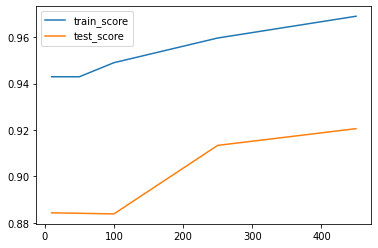

In [ ]:
import matplotlib.pyplot as plt
plt.plot(estimators,train_score,label='train_score')
plt.plot(estimators,test_score,label='test_score')
plt.legend()
plt.show()

In [ ]:
train_score1=[]
test_score1=[]
max_depth=[3,9,11,15,20,35,50]
for i in max_depth:
  XGB=XGBClassifier(max_depth=i,n_estimators=450,learning_rate=0.01,booster='gbtree',min_child_weight=1,colsample_bytree=0.7)
  XGB.fit(X_train,y_train)
  predict_tr=XGB.predict(X_train)
  predict_test=XGB.predict(X_test1)
  train_score1.append(f1_score(y_train,predict_tr))
  test_score1.append(f1_score(y_test,predict_test))
  print(' For {} estimator the train score is {}'.format(i,f1_score(y_train,predict_tr)))
  print('For {} estimator the test score is {}'.format(i,f1_score(y_test,predict_test)))

 For 3 estimator the train score is 0.9690831885339447
For 3 estimator the test score is 0.9205805920010142
 For 9 estimator the train score is 0.9889779356844379
For 9 estimator the test score is 0.9286699836936071
 For 11 estimator the train score is 0.9918110490328568
For 11 estimator the test score is 0.9288820135462832
 For 15 estimator the train score is 0.9973546304026394
For 15 estimator the test score is 0.9289402713607761
 For 20 estimator the train score is 0.9994373668769843
For 20 estimator the test score is 0.9290206648697215
 For 35 estimator the train score is 0.9994976691850185
For 35 estimator the test score is 0.9291460331390126
 For 50 estimator the train score is 0.9994976691850185
For 50 estimator the test score is 0.9291684078562473


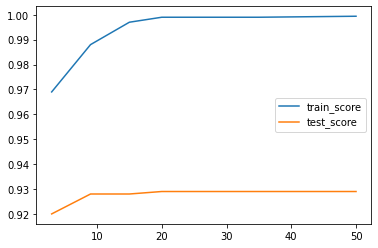

In [ ]:
import matplotlib.pyplot as plt
train_score1=[0.969,0.988,0.991,0.997,0.999,0.999,0.9994]
test_score1=[0.920,0.928,0.928,0.928,0.929,0.929,0.929]
max_depth=[3,9,11,15,20,35,50]
plt.plot(max_depth,train_score1,label='train_score')
plt.plot(max_depth,test_score1,label='test_score')
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier(max_depth=3,n_estimators=450,learning_rate=0.01,booster='gbtree',min_child_weight=1,colsample_bytree=0.7)
XGB.fit(X_train,y_train)
predict_tr=XGB.predict(X_train)
predict_test=XGB.predict(X_test1)

In [ ]:
from sklearn.metrics import f1_score
f1score_tr=f1_score(y_train,predict_tr)
print('Train F1-score={}'.format(f1score_tr))
f1score_test=f1_score(y_test,predict_test)
print('Test F1-score={}'.format(f1score_test))

Train F1-score=0.9690831885339447
Test F1-score=0.9205805920010142


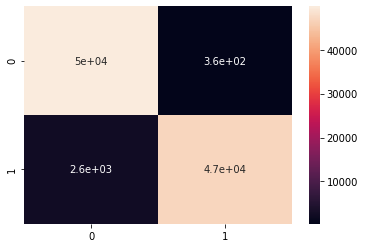

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
confusion_tr=confusion_matrix(y_train,predict_tr)
confusion_test=confusion_matrix(y_test,predict_test)
train_sb=sb.heatmap(confusion_tr,annot=True)

In [ ]:
precision_tr=(confusion_tr/(confusion_tr.sum(axis=0)))
print(precision_tr)

[[0.94957535 0.00756012]
 [0.05042465 0.99243988]]


Text(0.5, 1.0, 'Precision_train')

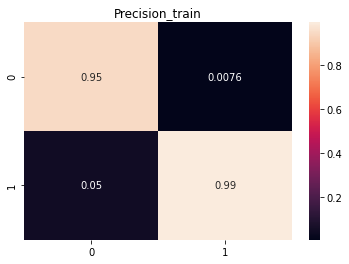

In [ ]:
precision_sb=sb.heatmap(precision_tr,annot=True)
precision_sb.set_title('Precision_train')

In [ ]:
recall_tr=(confusion_tr/(confusion_tr.sum(axis=1)))
print(recall_tr)

[[0.99285217 0.00721246]
 [0.05272275 0.9468006 ]]


Text(0.5, 1.0, 'Recall_train')

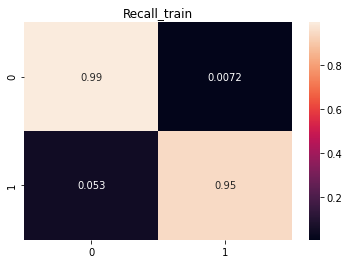

In [ ]:
recall_sb=sb.heatmap(recall_tr,annot=True)
recall_sb.set_title('Recall_train')

Text(0.5, 1.0, 'Test Confusion matrix')

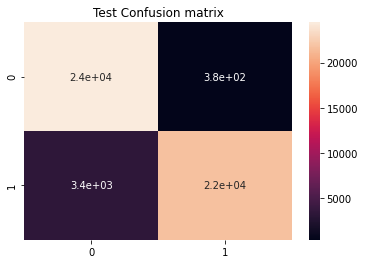

In [ ]:
test_sb=sb.heatmap(confusion_test,annot=True)
test_sb.set_title('Test Confusion matrix')

In [ ]:
precision_test=confusion_test/(confusion_test.sum(axis=0))
print(precision_test)

[[0.87869642 0.01727638]
 [0.12130358 0.98272362]]


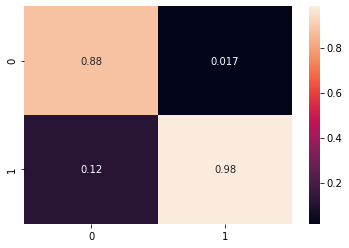

In [ ]:
sb_testpr=sb.heatmap(precision_test,annot=True)
sb_testpr

In [ ]:
recall_test=confusion_test/(confusion_test.sum(axis=1))
print(recall_test)

[[0.98458008 0.01522137]
 [0.13592077 0.86582943]]


Text(0.5, 1.0, 'Recall_test')

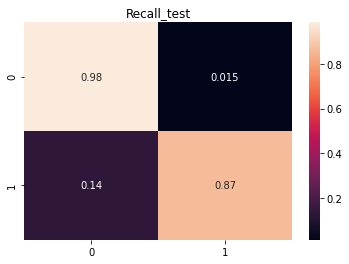

In [ ]:
sb_recallte=sb.heatmap(recall_test,annot=True)
sb_recallte.set_title('Recall_test')

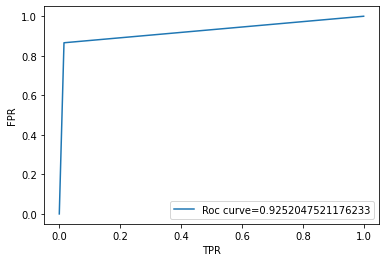

In [ ]:
from sklearn.metrics import roc_curve,auc
tpr,fpr,thresh=roc_curve(y_test,predict_test)
plt.plot(tpr,fpr,label='Roc curve={}'.format(auc(tpr,fpr)))
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


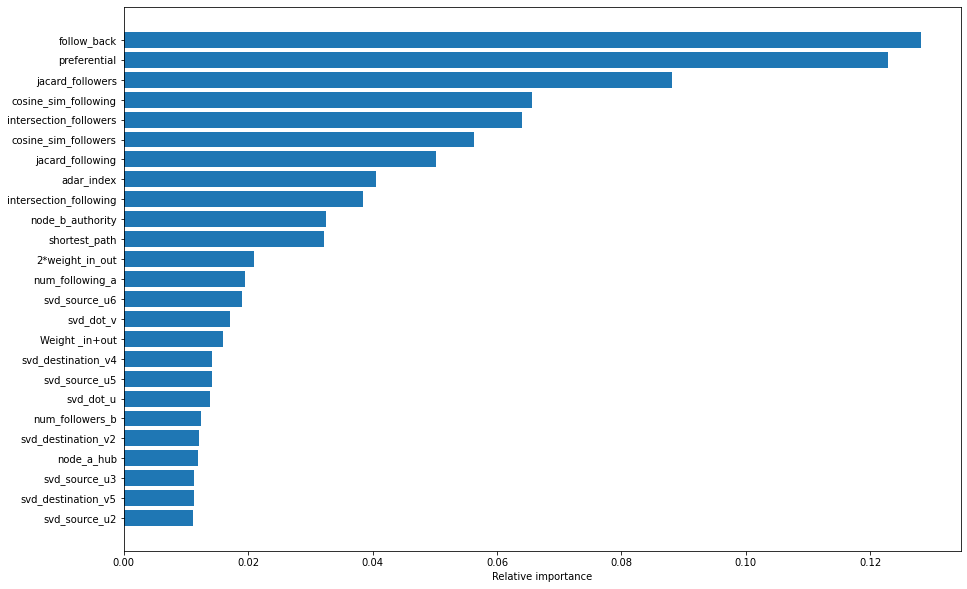

In [ ]:
import numpy as np
columns1=X_train.columns
importances=XGB.feature_importances_ #This give feature importance to each and every column in a dataframe
indices=np.argsort(importances)[-25:]
plt.figure(figsize=(15,10))
plt.barh(range(len(indices)),importances[[indices]])
plt.yticks(range(len(indices)),[columns1[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()